# Testing DeepSeek's ability to generate data sets

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re
import math

In [183]:
dsDF = pd.read_csv("../LLM_Generated/DeepSeek/10Countries.csv")
compDF = pd.read_csv("../completeDatasets/pricesComplete.csv")

In [184]:
# dsDF.info()
# compDF.info()

for col in ["acceptanceRate", "percOfIntStud"]:
    dsDF[col] = dsDF[col].str.replace('%', '', regex=False).astype(float)

merged_df = dsDF.merge(compDF, on="university", suffixes=("_df1", "_df2"))
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   university            53 non-null     object 
 1   ranking_df1           53 non-null     int64  
 2   tuition_df1           53 non-null     int64  
 3   percOfIntStud_df1     53 non-null     float64
 4   acceptanceRate_df1    53 non-null     float64
 5   safetyIndex_df1       53 non-null     int64  
 6   livingCost_df1        53 non-null     int64  
 7   rentCost_df1          53 non-null     int64  
 8   groceriesCost_df1     53 non-null     int64  
 9   recreationCost_df1    53 non-null     int64  
 10  healthcareCost_df1    53 non-null     int64  
 11  transportCost_df1     53 non-null     int64  
 12  link_df1              53 non-null     object 
 13  Computer Science_df1  53 non-null     int64  
 14  Business_df1          53 non-null     int64  
 15  Economics_df1         53 

## Linear regression

In [185]:
regressor = LinearRegression()
r2_scores = {}

## Ranking

Column: ranking
  Slope: 0.9704
  Intercept: 297.0480
  R² Score: 0.5496



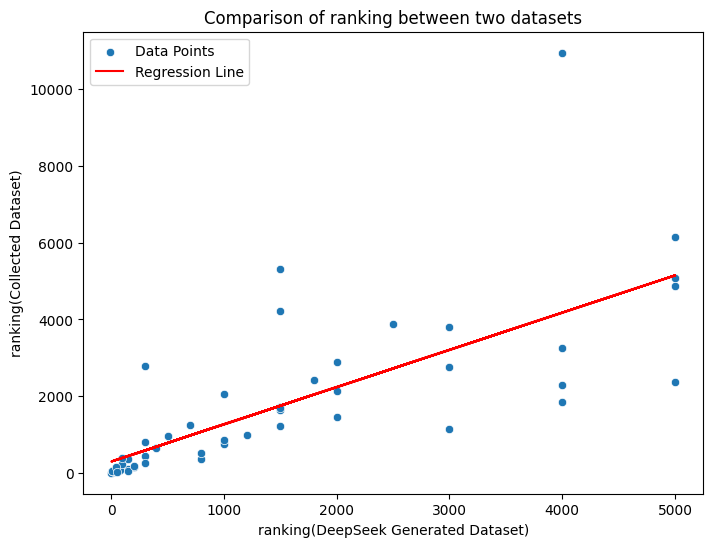

In [186]:
column = "ranking"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Tuition

Column: tuition
  Slope: 0.6997
  Intercept: 1809.3057
  R² Score: 0.6389



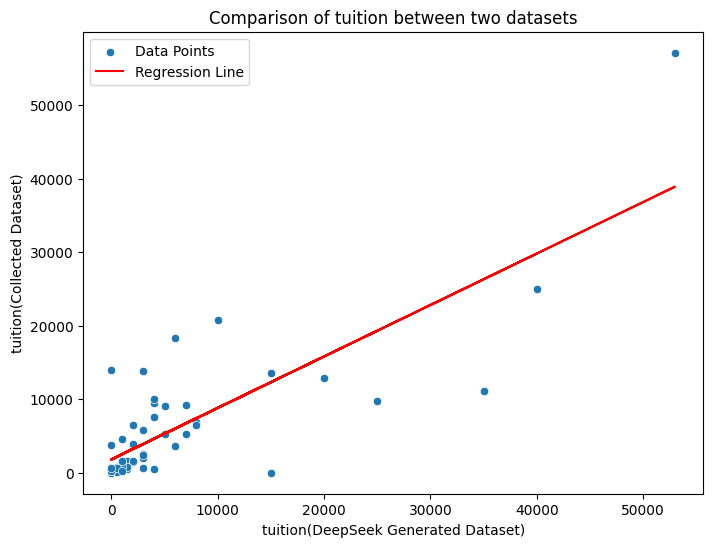

In [187]:
column = "tuition"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Percentage of international students

Column: percOfIntStud
  Slope: 0.5391
  Intercept: 3.7417
  R² Score: 0.3836



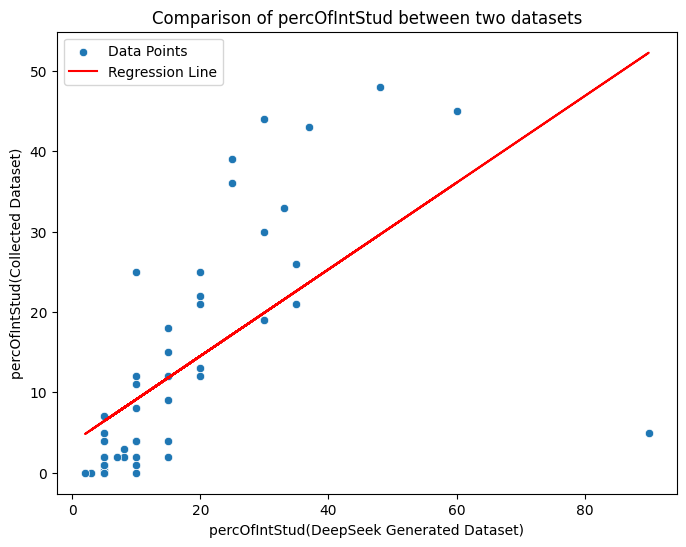

In [188]:
column = "percOfIntStud"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Acceptance rate

Column: acceptanceRate
  Slope: 0.3638
  Intercept: 24.1038
  R² Score: 0.1267



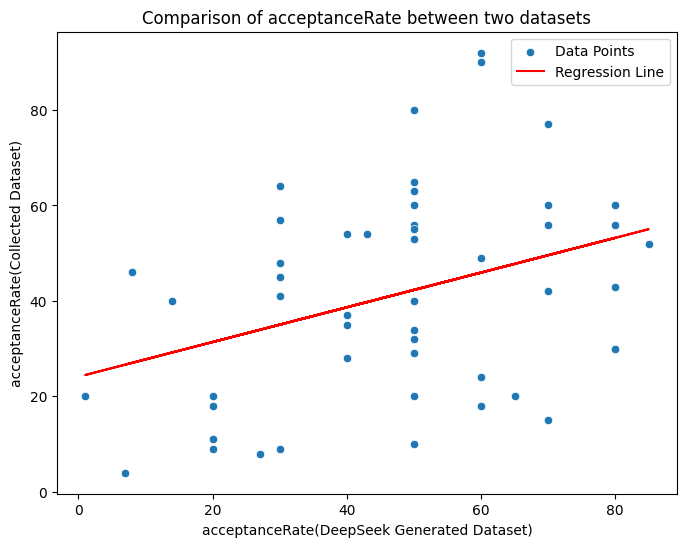

In [189]:
column = "acceptanceRate"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of living

Column: livingCost
  Slope: 0.5634
  Intercept: 379.0043
  R² Score: 0.5666



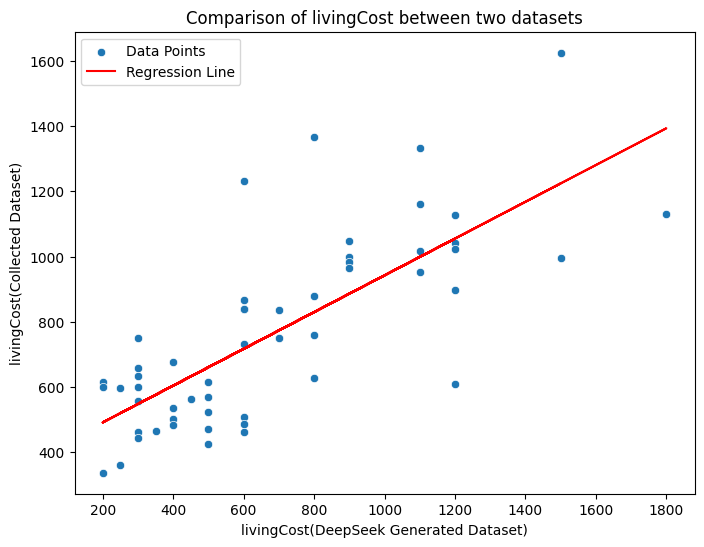

In [190]:
column = "livingCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of rent

Column: rentCost
  Slope: 1.0871
  Intercept: 191.1662
  R² Score: 0.6649



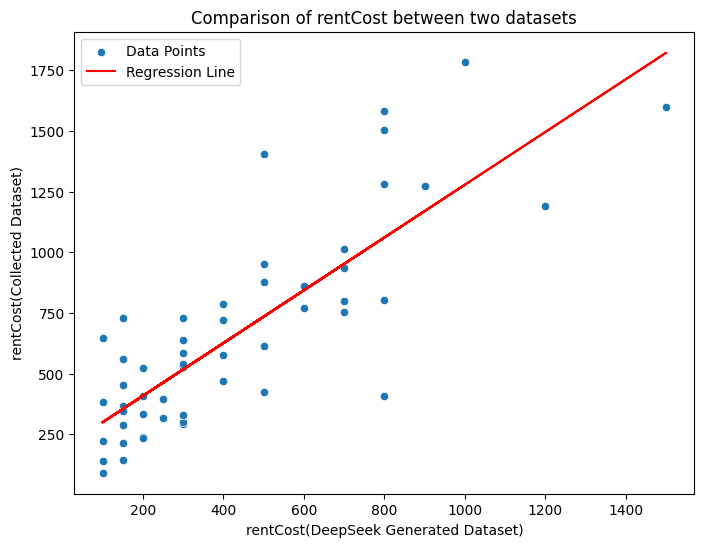

In [191]:
column = "rentCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of groceries

Column: groceriesCost
  Slope: 0.8981
  Intercept: 94.5484
  R² Score: 0.4165



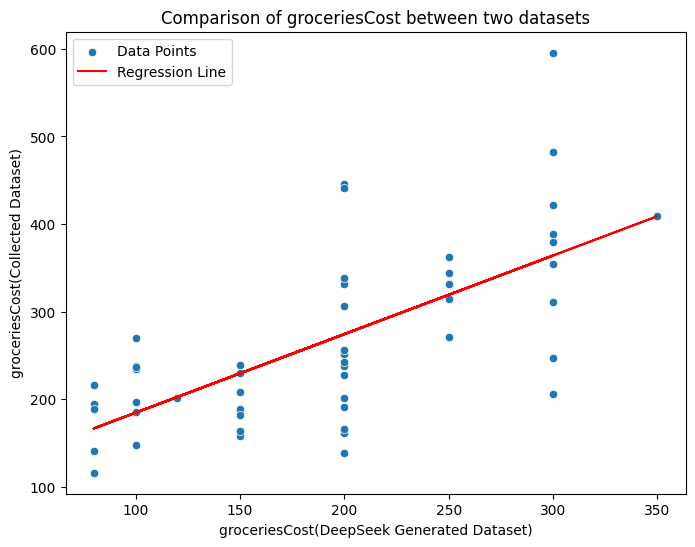

In [192]:
column = "groceriesCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of recreation

Column: recreationCost
  Slope: 0.5332
  Intercept: 19.7415
  R² Score: 0.7001



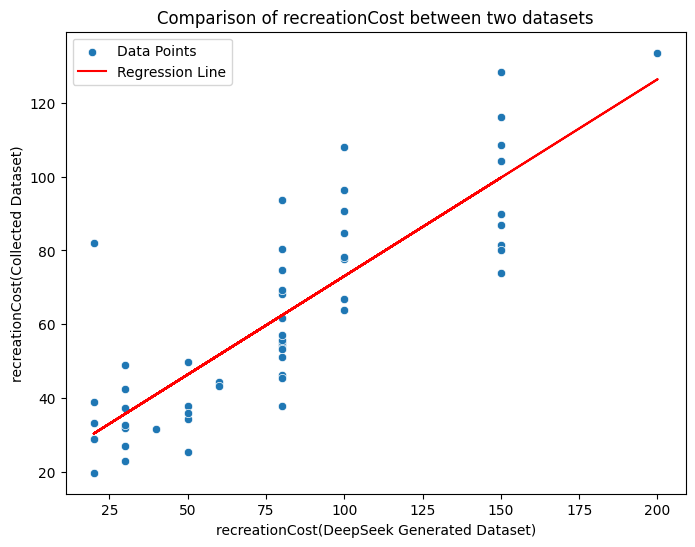

In [193]:
column = "recreationCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Healthcare cost

Column: healthcareCost
  Slope: 1.1785
  Intercept: 186.5568
  R² Score: 0.2394



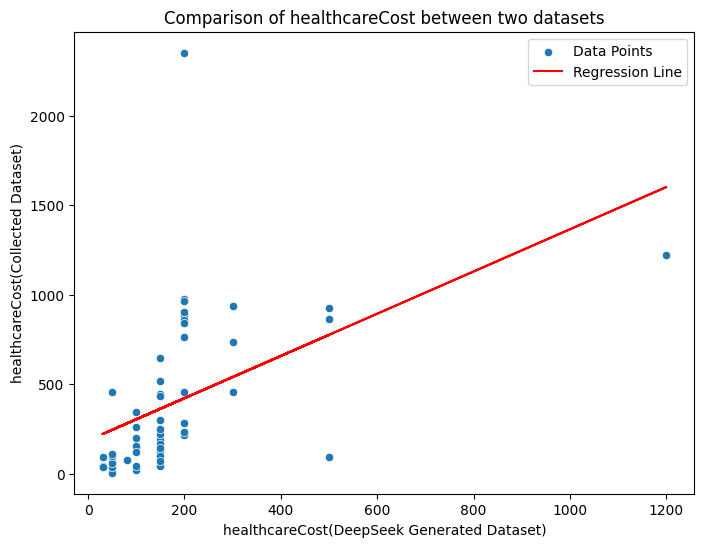

In [194]:
column = "healthcareCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of transportation

Column: transportCost
  Slope: 0.9063
  Intercept: 5.4130
  R² Score: 0.6721



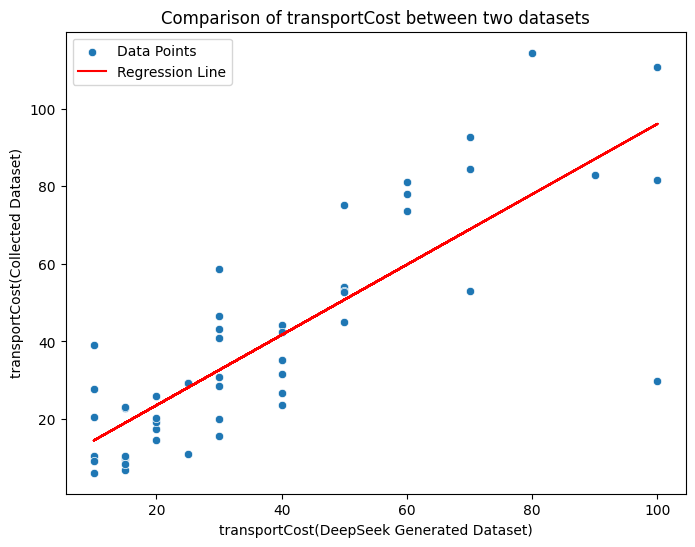

In [195]:
column = "transportCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()